# Firm bankrupcy prediction

**Dataset source and features informations :**
> https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

**Some details about the dataset :** 
> The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

**Source :**
> Deron Liang and Chih-Fong Tsai, deronliang '@' gmail.com; cftsai '@' mgt.ncu.edu.tw, National Central University, Taiwan
The data was obtained from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Taiwanese+Bankruptcy+Prediction

## 1- Data collection and description

In [1]:
import pandas as pd
import numpy as np

origin_data = pd.read_csv("dataset/data.csv")
origin_data.head(5)

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [2]:
origin_data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [4]:
print("distinct Data types : ",set(origin_data.dtypes.values))
print("Number of (int) features : ", origin_data.dtypes[origin_data.dtypes=="int64"].count())
print("Number of (float) features : ", origin_data.dtypes[origin_data.dtypes=="float64"].count())

missing_values_count = origin_data.isnull().sum().sum()
print("Missing values :",missing_values_count)

distinct Data types :  {dtype('int64'), dtype('float64')}
Number of (int) features :  3
Number of (float) features :  93
Missing values : 0


**Problem definition:**
> Classification problem, with bankcrupt column as label.<br>
 features : There is 95 . All of them are Financial Ratios and Corporate Governance Indicators in Bankruptcy  Prediction
<br>
raws :  Data contains 6819 raws from different companies (companies have at least 3 years of public info)
<br>
Missing values : No 

## 2- EDA

### 2.0 - Visualizing data 

#### 2-0-1. Original Data

In [180]:
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = deepcopy(origin_data)
df_features = df.drop("Bankrupt?",axis=1) 
df_target = df["Bankrupt?"] 

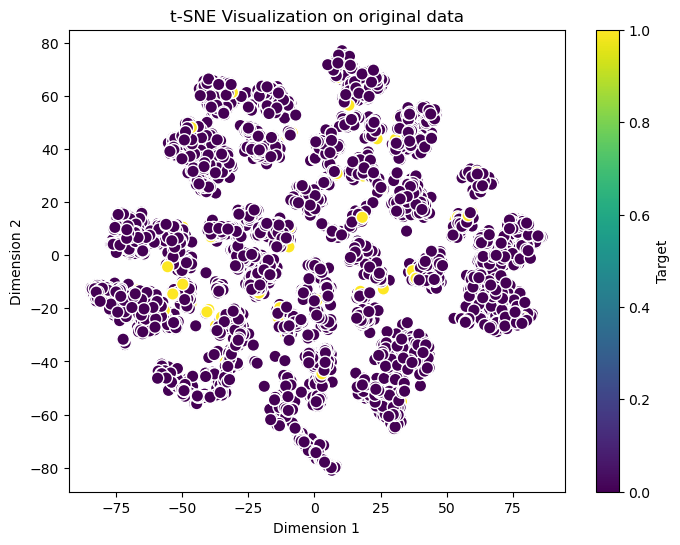

In [182]:
# ---------- Data manifold -------------
from sklearn.manifold import TSNE

X, y = df_features.values, df_target.values

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization on original data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

> 1- The data maniflod shows that classes are unbalanced, the next step will be to balanced them <br>
2- It also shows that data is not linearly separable <br>
3- Furthermore there is some visible clusters <br>
4- It seems that in each cluster, the portion of bankrupted company is exactly located in  specific area <br>
5- Uniformization will give a better view <br>
6- Also the manifold doesn't shows presence of outliers

#### 2-0-1. Original Data (Balanced)

In [183]:
from imblearn.over_sampling import SMOTE

X, y = df_features.values, df_target.values

# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_result, y_result = sm.fit_resample(X, y)

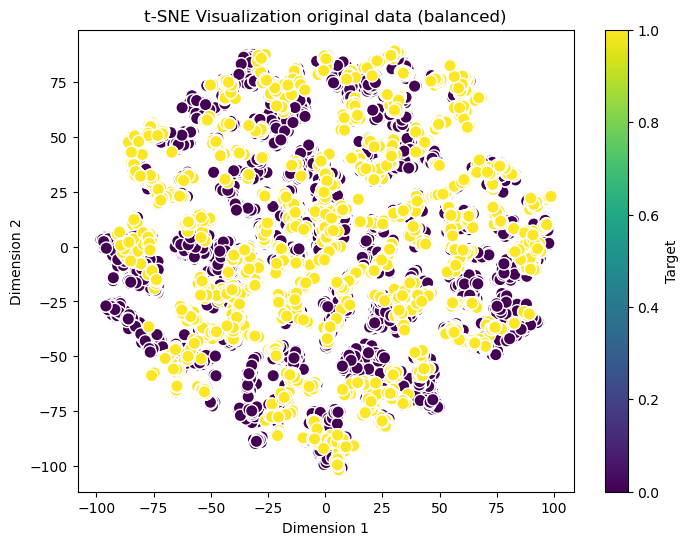

In [185]:
# ---------- Data manifold -------------
from sklearn.manifold import TSNE

X, y = X_result, y_result

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization original data (balanced)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

> By balacing the data we can have a better overview of how bankrupcied companies are distributed 
The outline is that data we will need to find the best features that can really explain the phenomenon of bankrupcy as, the whole dataset seems noisy <br> <br>
By performing correlation analysis (1) and dependencies (2) between features and the target variable we can maybe see what features really impact the bankrupcy. This will help the avoid noise and make the manifold more clear in terms of class separation.

### 2.1 -  Analyzing correlations to the bankruptcy (target variable)

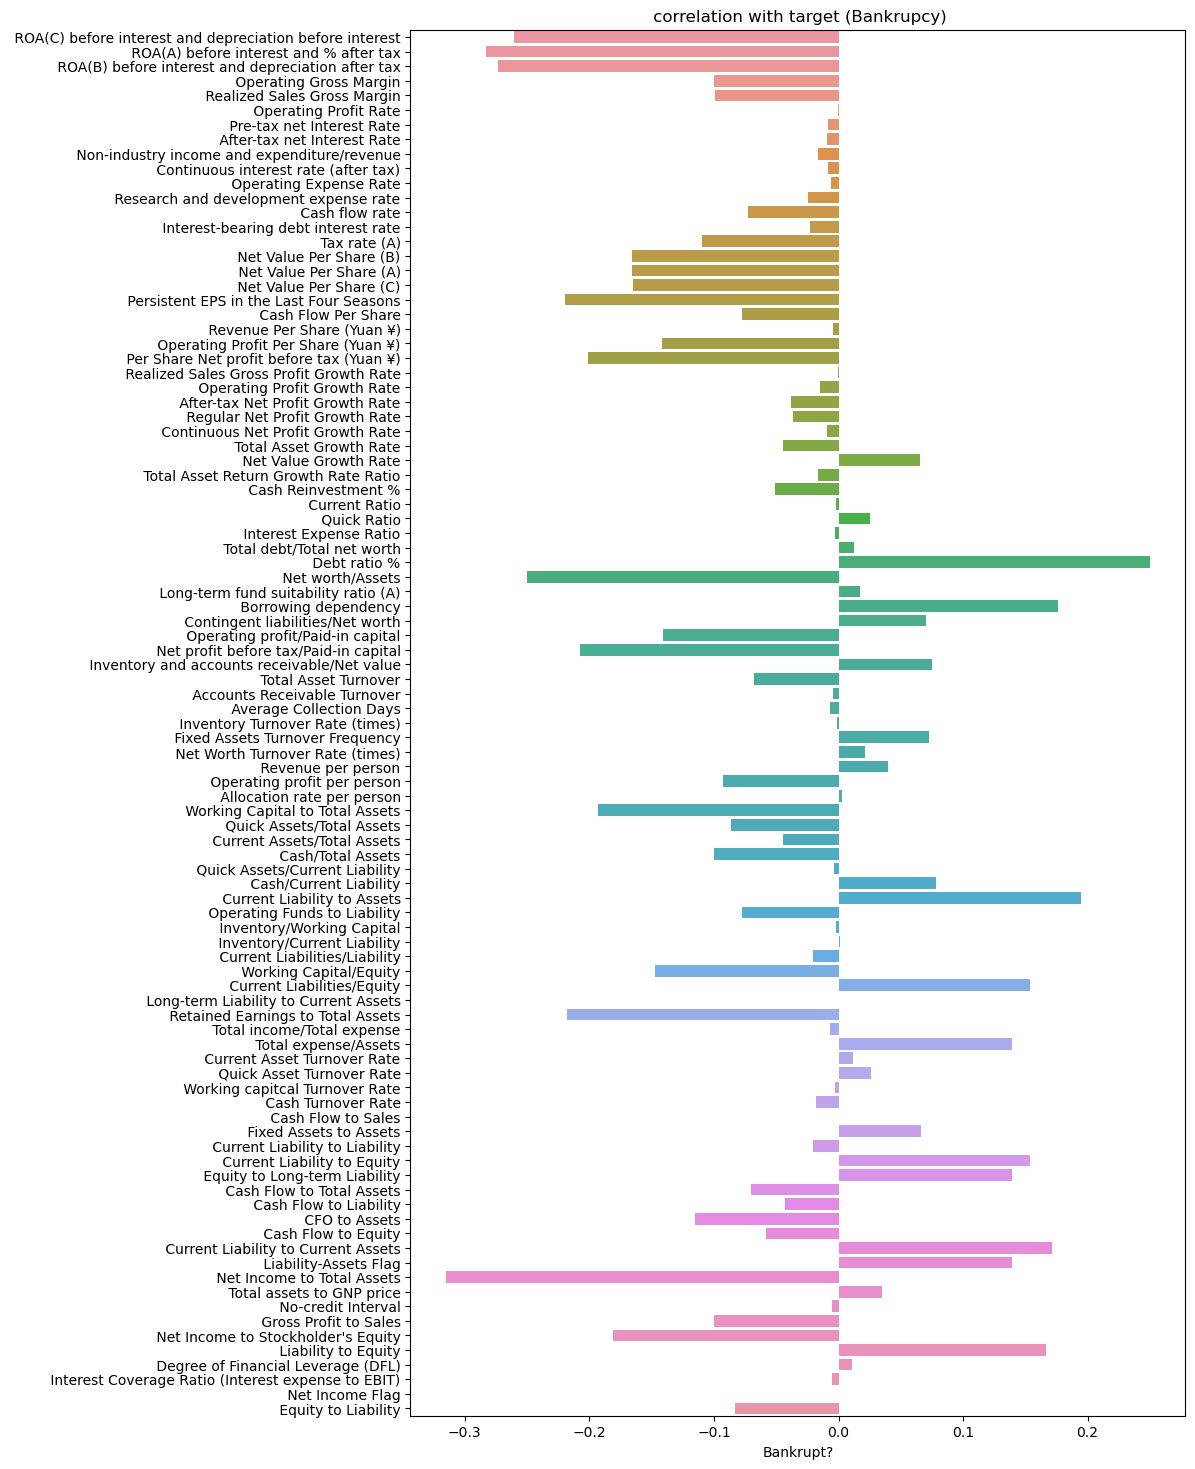

In [186]:
correlation_matrix = pd.DataFrame(df.corr(numeric_only=True))
target_correlation = pd.DataFrame(correlation_matrix["Bankrupt?"])

target_correlation = target_correlation.drop(['Bankrupt?'])

plt.figure(figsize=(10, 18))
sns.barplot(y=target_correlation.index, x= target_correlation['Bankrupt?'])
plt.title(" correlation with target (Bankrupcy)")
plt.show()

> each of all features are not correlated to bankrupcy : <br>
--  the most correlated feature is Net Income to total assets (-0.3). It doesn't means anything as the correlation is not high, but it make sens that companies with higher income to total assets will be less probable to fail.  We can also see that the debt ratio, ROA also seems important. <br>
-- To avoid noise, we will drop feature will really bad correlation (< 0.10 or > -0.1)

In [187]:
# Removing uncorrelated feature 
# Lets see what features has weak correlation to strong correlation (>|0.10|)
target_correlation_abs = np.abs(target_correlation)

features_corr = []
i=1
print("Features correlated to bankrupcy :")
for feature in target_correlation[target_correlation_abs["Bankrupt?"] > 0.1].index:
    print(i," -", feature)
    features_corr.append(feature)
    i+=1

Features correlated to bankrupcy :
1  -  ROA(C) before interest and depreciation before interest
2  -  ROA(A) before interest and % after tax
3  -  ROA(B) before interest and depreciation after tax
4  -  Operating Gross Margin
5  -  Tax rate (A)
6  -  Net Value Per Share (B)
7  -  Net Value Per Share (A)
8  -  Net Value Per Share (C)
9  -  Persistent EPS in the Last Four Seasons
10  -  Operating Profit Per Share (Yuan ¥)
11  -  Per Share Net profit before tax (Yuan ¥)
12  -  Debt ratio %
13  -  Net worth/Assets
14  -  Borrowing dependency
15  -  Operating profit/Paid-in capital
16  -  Net profit before tax/Paid-in capital
17  -  Working Capital to Total Assets
18  -  Cash/Total Assets
19  -  Current Liability to Assets
20  -  Working Capital/Equity
21  -  Current Liabilities/Equity
22  -  Retained Earnings to Total Assets
23  -  Total expense/Assets
24  -  Current Liability to Equity
25  -  Equity to Long-term Liability
26  -  CFO to Assets
27  -  Current Liability to Current Assets
28

### 2.2- Analysing correlation between resulting features

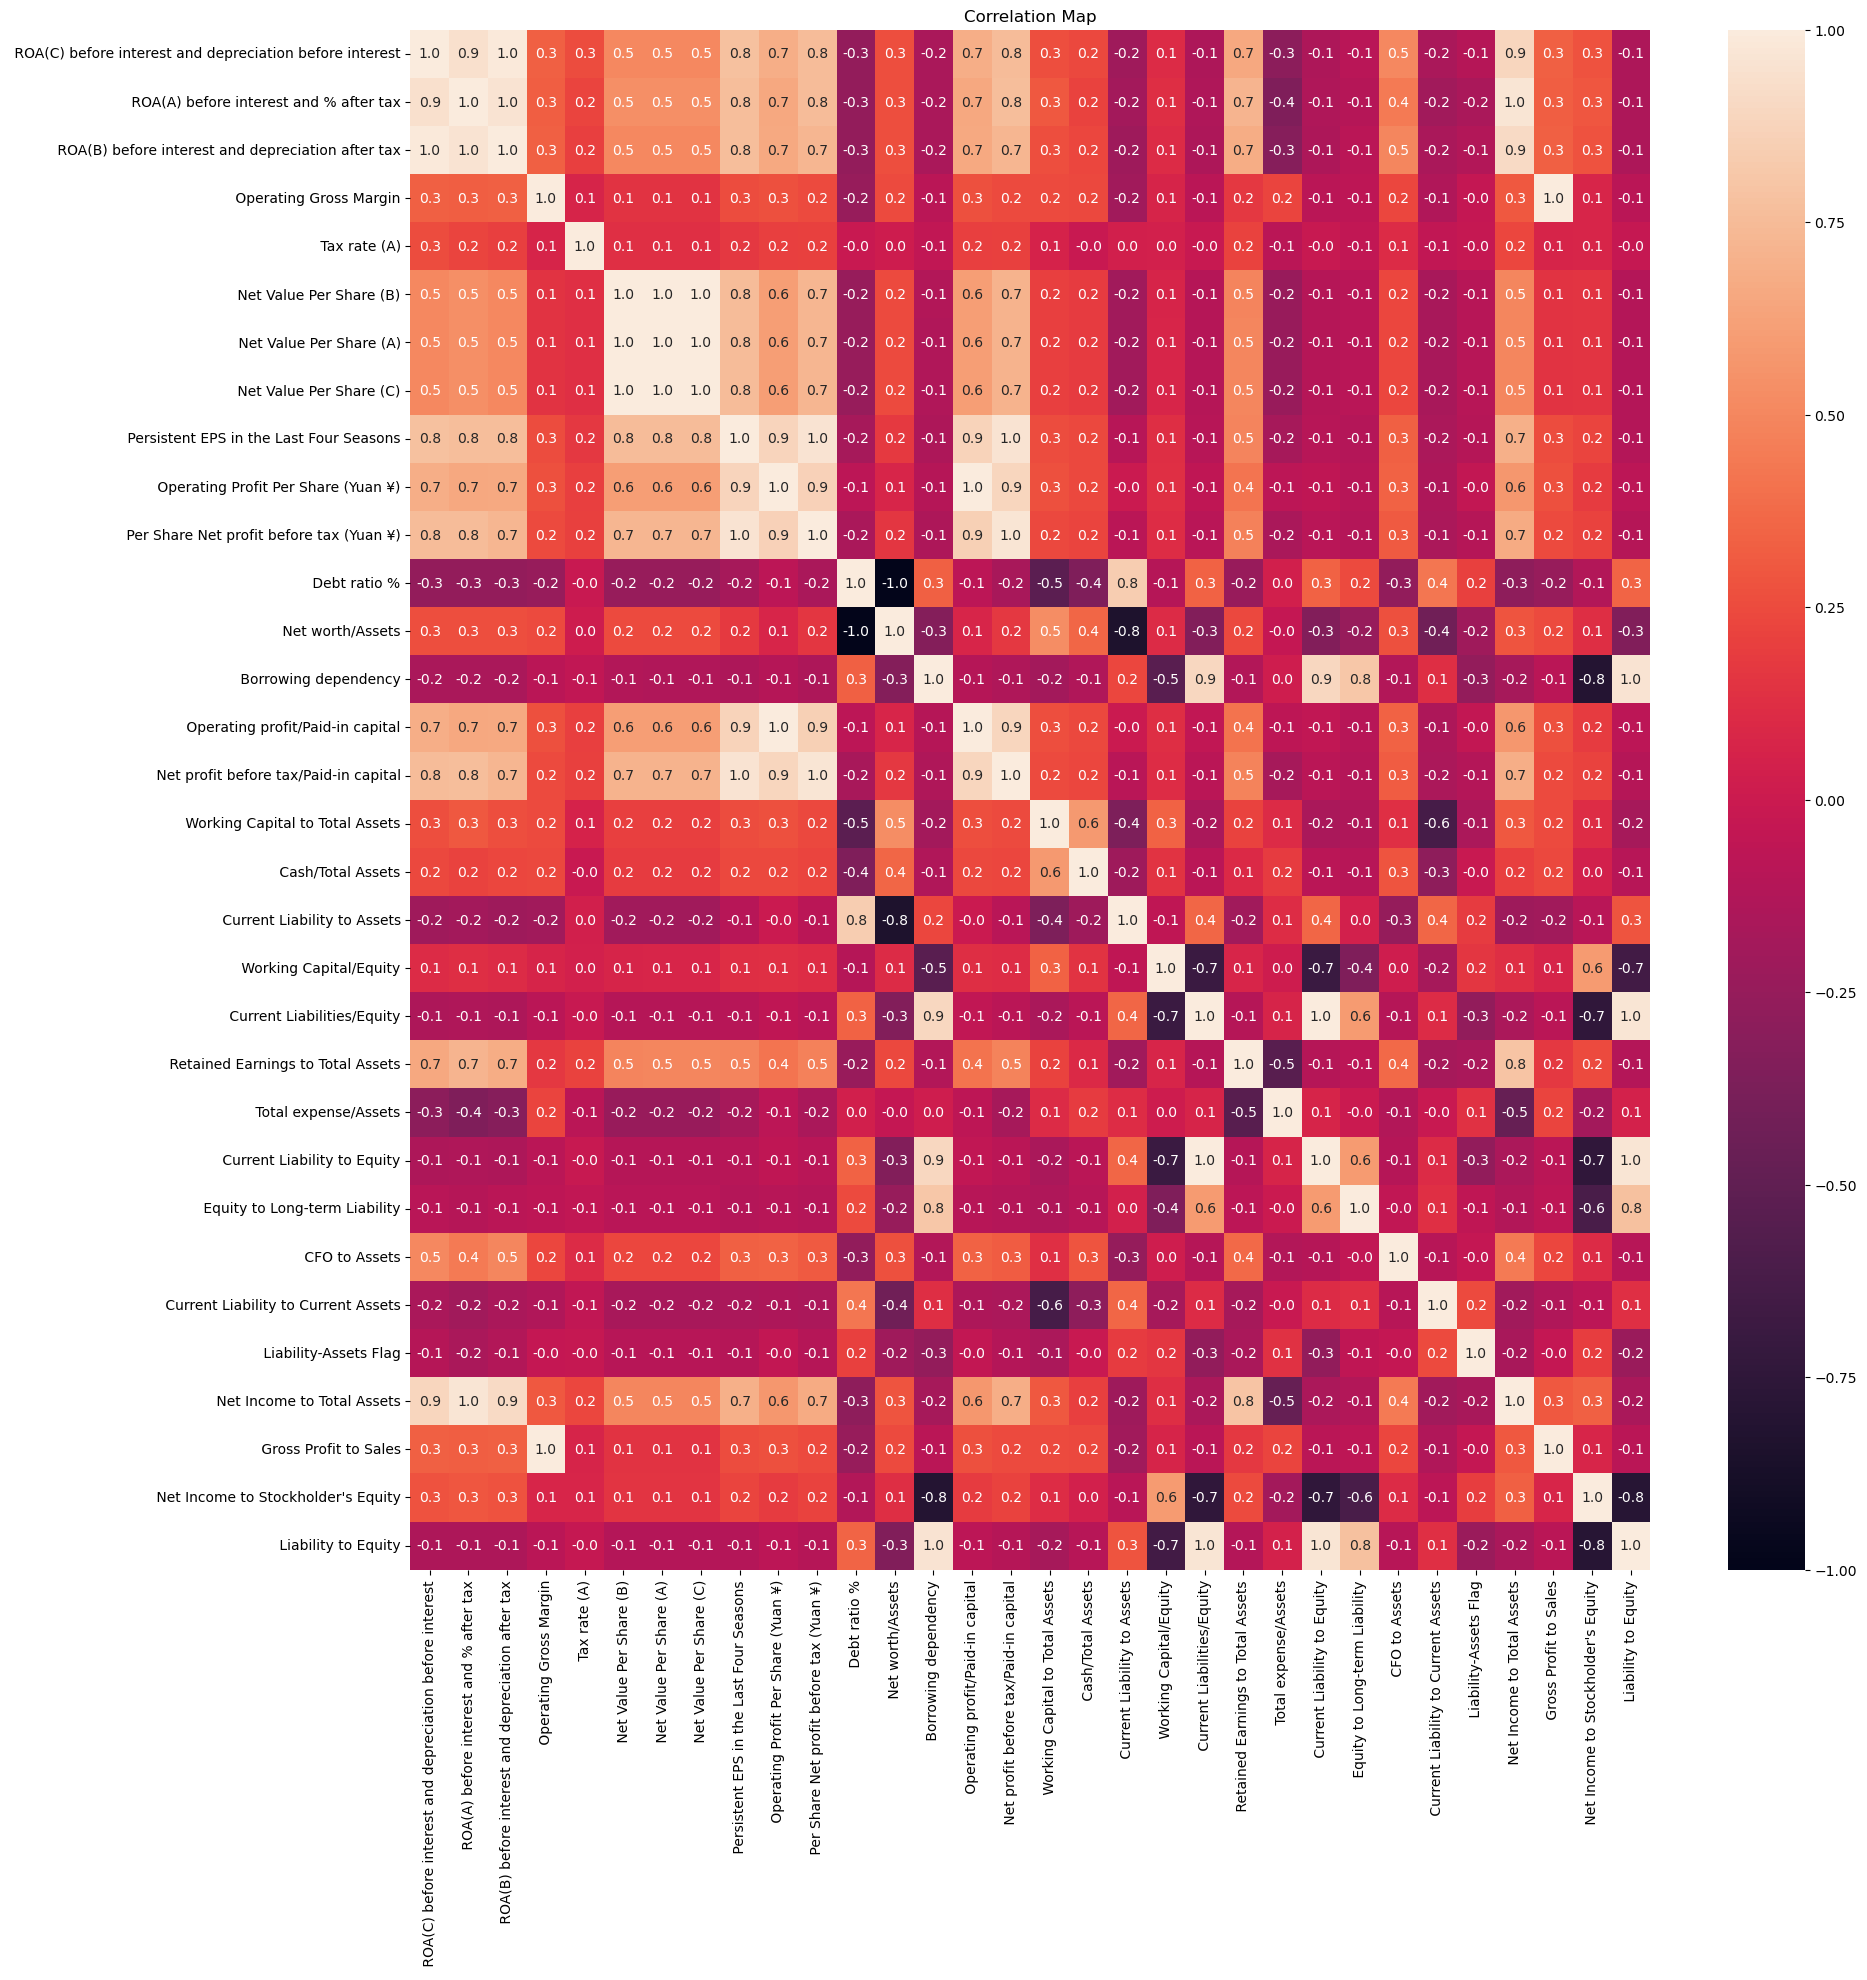

In [192]:
resulting_df = df[features_corr]
correlation_mresulting_df = resulting_df.corr()

# Plot the correlation map (heatmap)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_mresulting_df, annot=True, fmt=".1f")
plt.title('Correlation Map')
plt.show()

> we observe some correlation behavior between feature. Some features may not be useful as they have the same information as others features. <br> This can be noisy, so we will also drop some highly correlated features <br>

In [189]:
feature_to_remove = [" ROA(B) before interest and depreciation after tax",
                     " ROA(C) before interest and depreciation before interest",
                     " Net Value Per Share (A)",
                     " Net Value Per Share (C)",
                     " Per Share Net profit before tax (Yuan ¥)",
                     " Current Liability to Equity",
                     " Current Liability to Assets",
                     " Current Liabilities/Equity",
                     " Net worth/Assets",
                     " Operating profit/Paid-in capital",
                     " Net profit before tax/Paid-in capital",
                     " Net Income to Total Assets",
                     " Gross Profit to Sales",
                     " Liability to Equity",
                     " Equity to Long-term Liability",
                     " Retained Earnings to Total Assets",
                     " Persistent EPS in the Last Four Seasons",
                     " Current Liability to Assets",
                     " Net Income to Stockholder's Equity",
                     " Operating Profit Per Share (Yuan ¥)",
                     " Current Liability to Current Assets",
                     " Net Value Per Share (B)",
                     " Working Capital to Total Assets",
                     " Working Capital/Equity"
                    ]

features_corr_ = list(filter(lambda x: x not in feature_to_remove, features_corr))
i=1
print("Features correlated :")
for feature in features_corr_:
    print(i," -", feature)
    i+=1

Features correlated :
1  -  ROA(A) before interest and % after tax
2  -  Operating Gross Margin
3  -  Tax rate (A)
4  -  Debt ratio %
5  -  Borrowing dependency
6  -  Cash/Total Assets
7  -  Total expense/Assets
8  -  CFO to Assets
9  -  Liability-Assets Flag


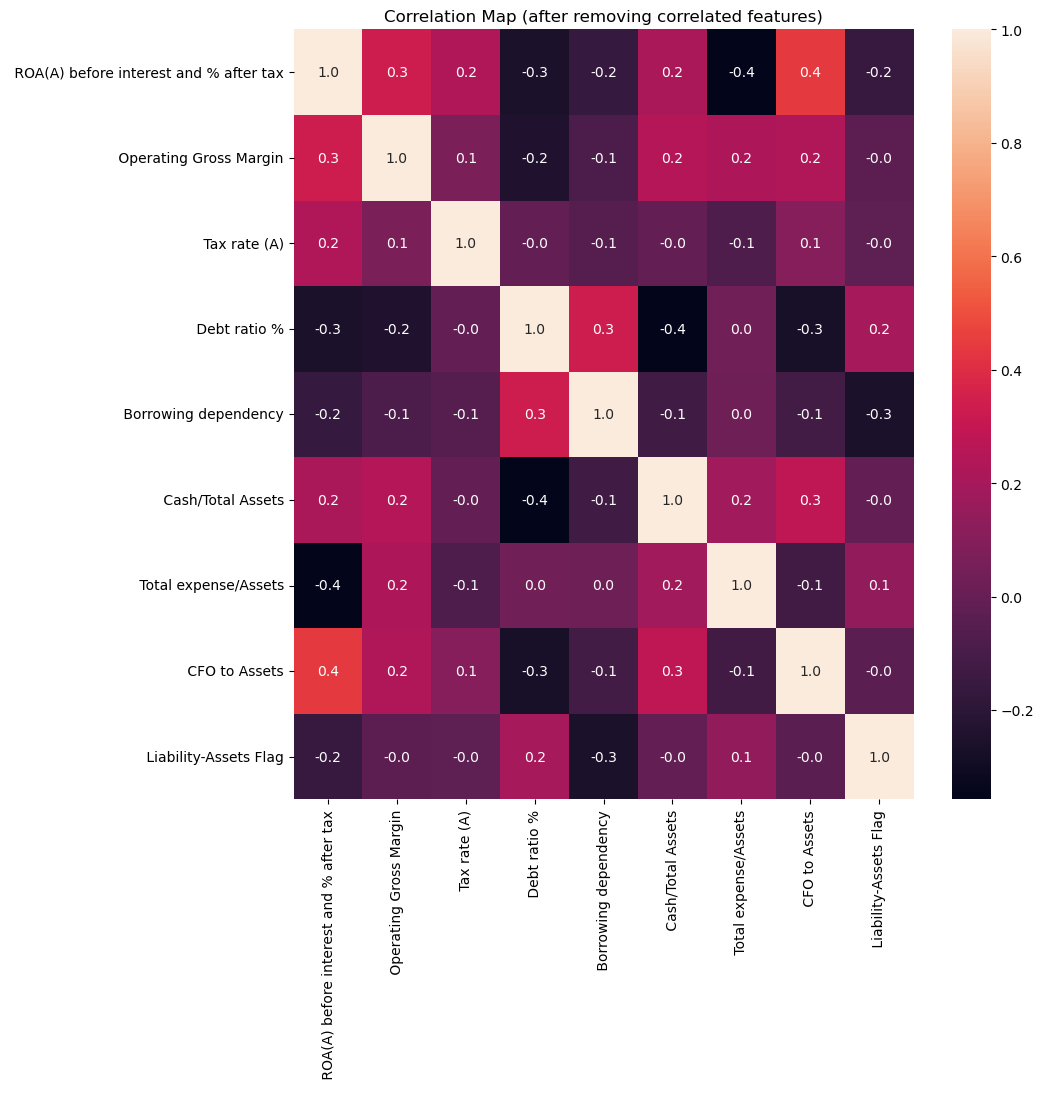

In [190]:
correlation_mresulting_df = df[features_corr_].corr()

# Plot the correlation map (heatmap)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_mresulting_df, annot=True, fmt=".1f")
plt.title('Correlation Map (after removing correlated features)')
plt.show()

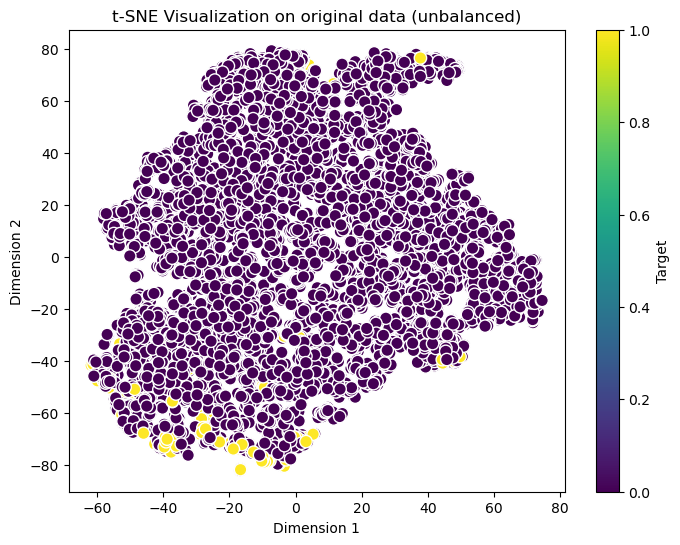

In [191]:
# ---------- Data manifold -------------
from sklearn.manifold import TSNE

X, y = df[features_corr_].values, df_target.values

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization on original data (unbalanced)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

> The unbalanced data manifold shows that using of these 9 features can be distinguish companies. As we see that most of bankrupcied companies are now bounding the maniflod. But, correlation measure linear dependcy between features or between features and target.<br> Maybe bankrupcy also depend on feature but not in the linear way. <br> We will have a look on those features on next sections

### 2.3- Analysing mutual dependency between each features and bankrupcy

In [193]:
from sklearn.feature_selection import mutual_info_classif
dependency = mutual_info_classif(df_features, pd.Series.ravel(df_target))
dependency = pd.Series(dependency,df_features.columns[0:len(df_features.columns)])
dependency = pd.DataFrame({'features':dependency.index, 'dependency':dependency.values})

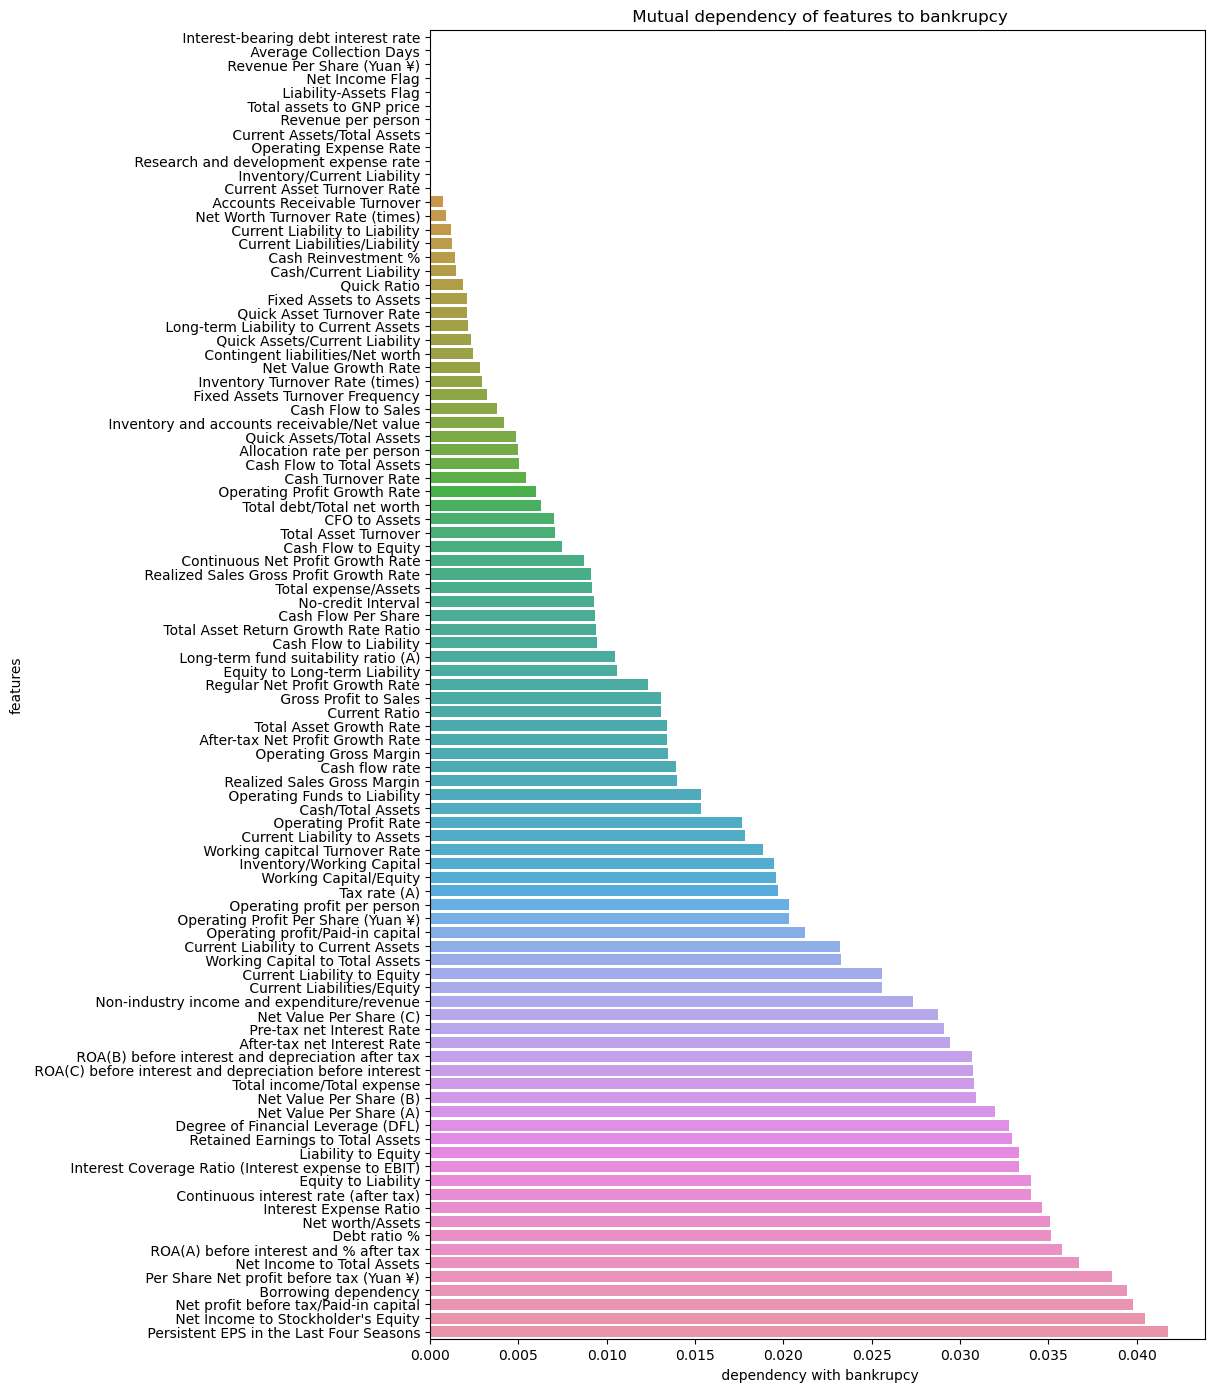

In [194]:
# Mutual information
plt.figure(figsize=(10, 17))
sns.barplot(data = dependency, y = "features", x = "dependency", order=dependency.sort_values('dependency').features)
plt.xlabel(" dependency with bankrupcy")
plt.title( " Mutual dependency of features to bankrupcy")
plt.show()

> Mutual information (MI) between two variables measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. <br> The function relies on nonparametric methods based on entropy estimation to measure predictive power of bankrupcy, for each feature. <br>
We can see that most of the features are also correlated to bankrupcy. But many of the top measures are not really correlated to bankcrupcy. <br> Continious interest rate (after tax) has higher mutual information to bankcrupcy, but whith relatively low correlation. <br> 
In th next section we work with the 10 best features

In [195]:
most_dependent_features = np.array(dependency.nlargest(10,'dependency').features)
i=1
print("Dependent features :")
for feature in most_dependent_features:
    print(i," -", feature)
    i+=1

Dependent features :
1  -  Persistent EPS in the Last Four Seasons
2  -  Net Income to Stockholder's Equity
3  -  Net profit before tax/Paid-in capital
4  -  Borrowing dependency
5  -  Per Share Net profit before tax (Yuan ¥)
6  -  Net Income to Total Assets
7  -  ROA(A) before interest and % after tax
8  -  Debt ratio %
9  -  Net worth/Assets
10  -  Interest Expense Ratio


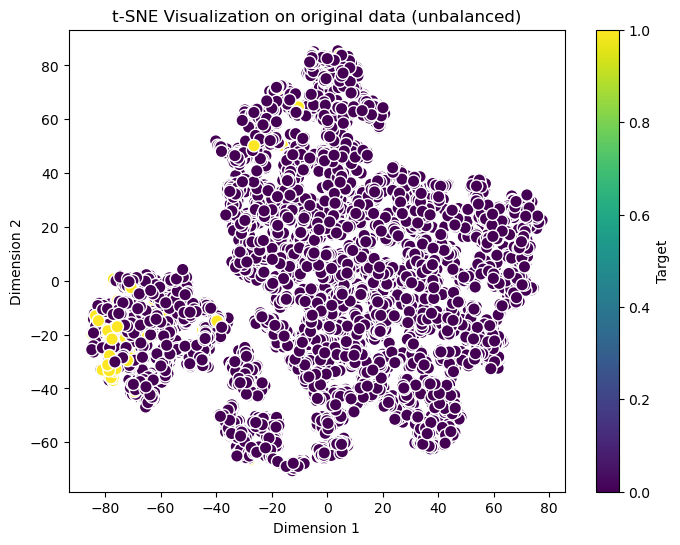

In [196]:
# ---------- Data manifold -------------
from sklearn.manifold import TSNE

X, y = df[most_dependent_features].values, df_target.values

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization on original data (unbalanced)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

> The unbalanced dataset manifold shows that these selected feature can also impact the classification task as the privious manilfofd ( with correlated variable )

### 2.4- Analysing linear dependent features and non-linrear dependent features

> In this section we use the union of correlated features and futures with best mutual information based on entropy measure. Then, we remove the correlation among features to avoid noise

In [213]:
selected_features = [*features_corr_ , *most_dependent_features]
selected_features = np.unique(selected_features)

i=1
print("Selected features :")
for feature in selected_features:
    print(i," -", feature)
    i+=1

Selected features :
1  -  Borrowing dependency
2  -  CFO to Assets
3  -  Cash/Total Assets
4  -  Debt ratio %
5  -  Interest Expense Ratio
6  -  Liability-Assets Flag
7  -  Net Income to Stockholder's Equity
8  -  Net Income to Total Assets
9  -  Net profit before tax/Paid-in capital
10  -  Net worth/Assets
11  -  Operating Gross Margin
12  -  Per Share Net profit before tax (Yuan ¥)
13  -  Persistent EPS in the Last Four Seasons
14  -  ROA(A) before interest and % after tax
15  -  Tax rate (A)
16  -  Total expense/Assets


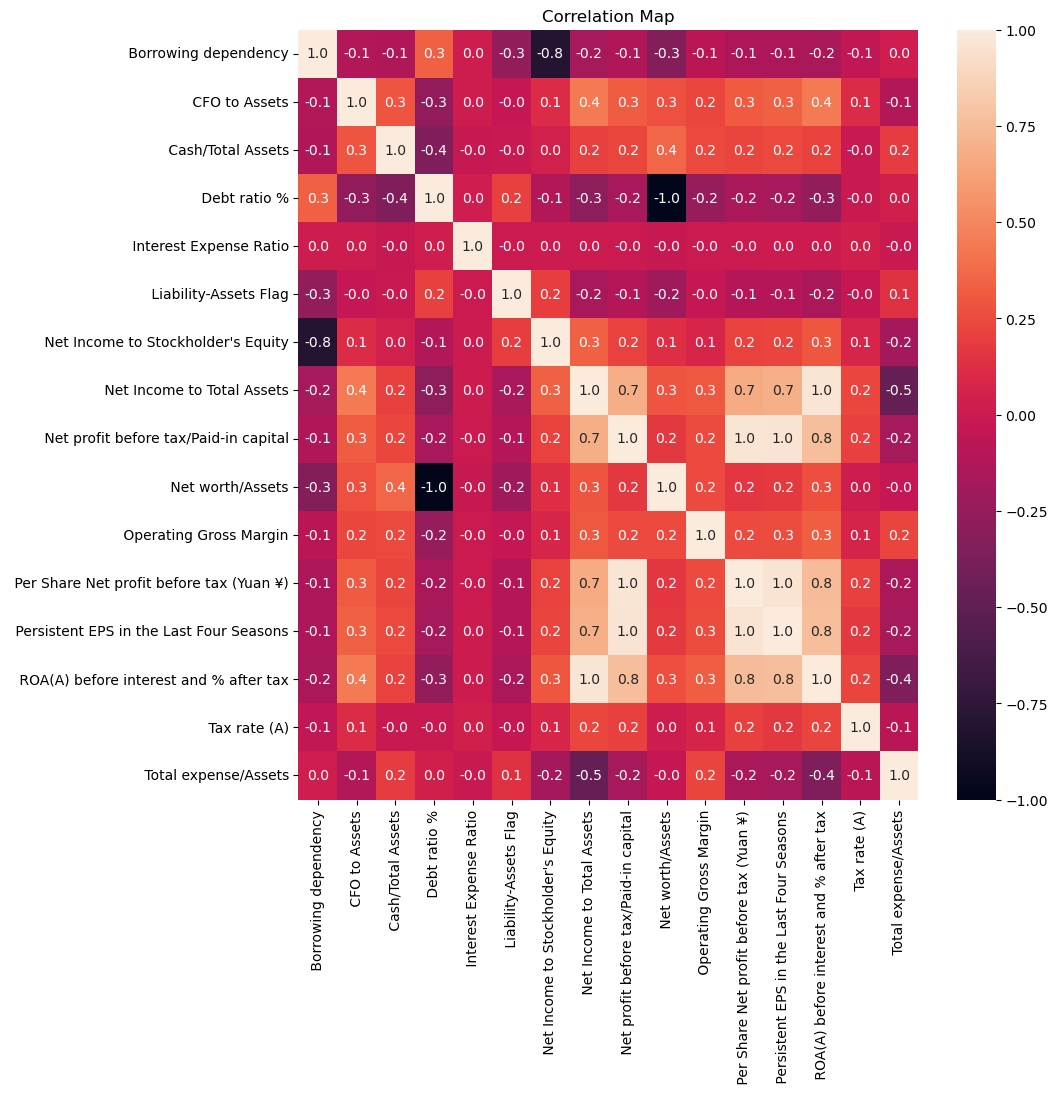

In [214]:
# correlation analysis 

correlation_mresulting_df = df[selected_features].corr()

# Plot the correlation map (heatmap)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_mresulting_df, annot=True, fmt=".1f")
plt.title('Correlation Map')
plt.show()

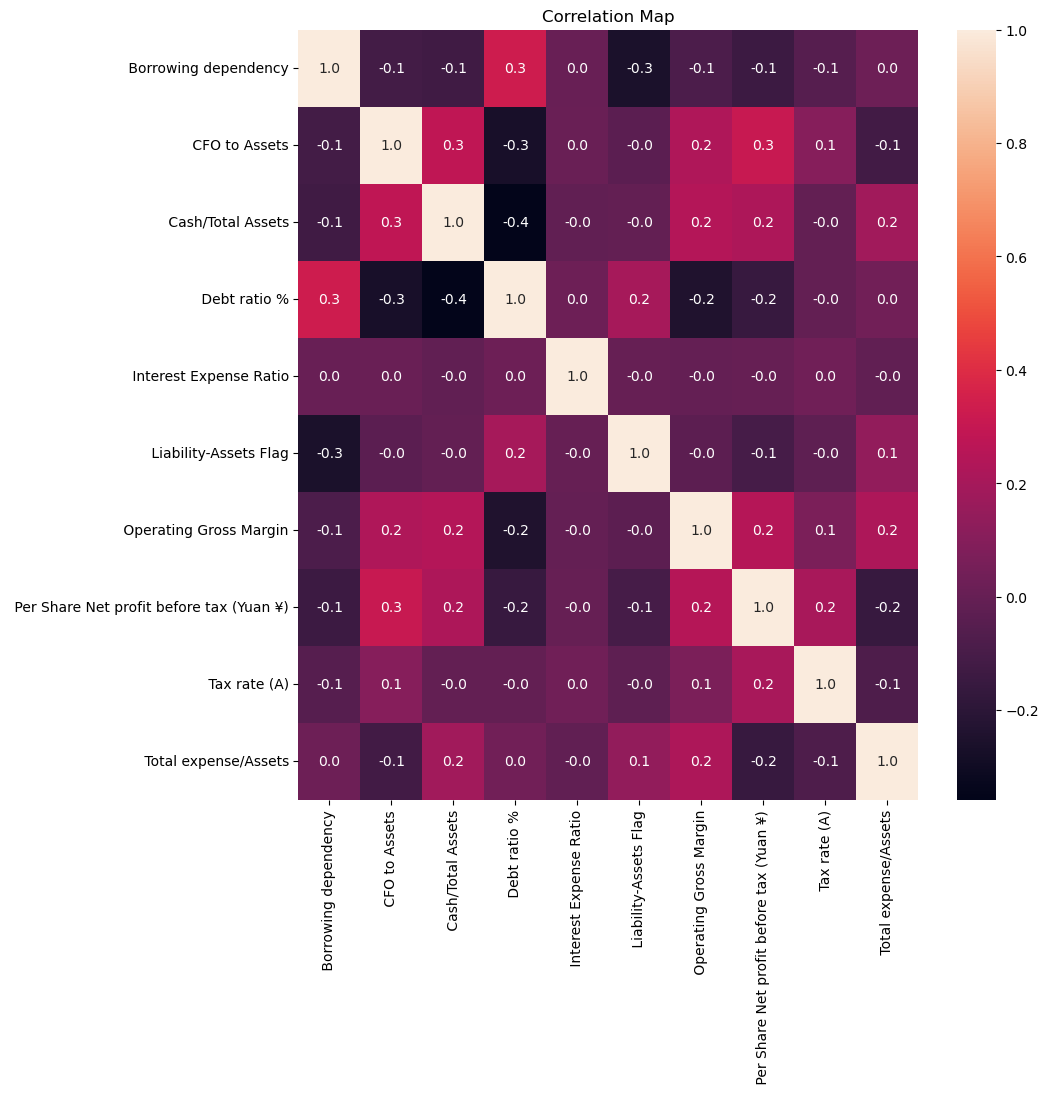

Features features :
1  -  Borrowing dependency
2  -  CFO to Assets
3  -  Cash/Total Assets
4  -  Debt ratio %
5  -  Interest Expense Ratio
6  -  Liability-Assets Flag
7  -  Operating Gross Margin
8  -  Per Share Net profit before tax (Yuan ¥)
9  -  Tax rate (A)
10  -  Total expense/Assets


In [215]:
feature_to_remove = [" Net Income to Total Assets",
                     " ROA(A) before interest and % after tax",
                     " Net profit before tax/Paid-in capital",
                     " Net Income to Stockholder's Equity",
                     " Net worth/Assets",
                     " Persistent EPS in the Last Four Seasons",
                    ]

# correlation analysis 
selected_features = list(filter(lambda x: x not in feature_to_remove, selected_features))

correlation_mresulting_df = df[selected_features].corr()

# Plot the correlation map (heatmap)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_mresulting_df, annot=True, fmt=".1f")
plt.title('Correlation Map')
plt.show()

i=1
print("Features features :")
for feature in selected_features:
    print(i," -", feature)
    i+=1

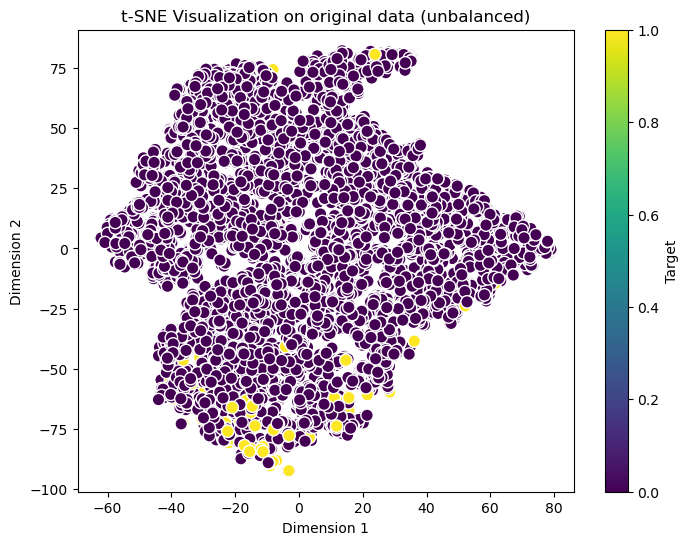

In [216]:
# ---------- Data manifold -------------
from sklearn.manifold import TSNE

X, y = df[selected_features].values, df_target.values

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization on original data (unbalanced)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

ratio of class 1 in the data : 0.03226279513125092


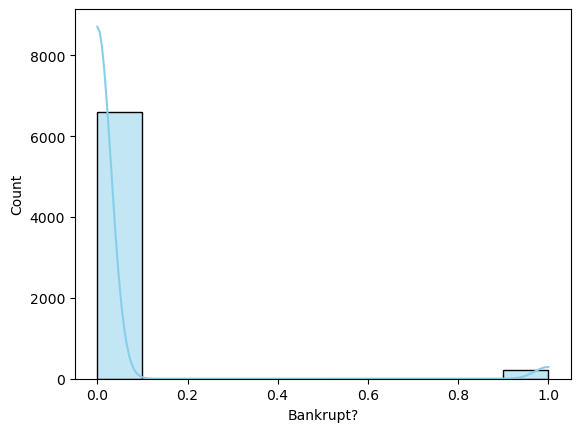

In [217]:
sns.histplot(df_target, bins=10, kde=True, color='skyblue')
number_bankrupted_company = df_target[df_target==1].count()
print("ratio of class 1 in the data :",number_bankrupted_company/df_target.count())

In [218]:
from imblearn.over_sampling import SMOTE

X, y = df[selected_features].values, df_target.values

# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

<Axes: ylabel='Count'>

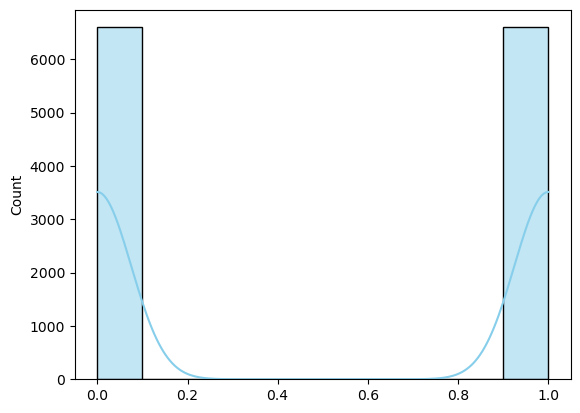

In [219]:
sns.histplot(y_res, bins=10, kde=True, color='skyblue')

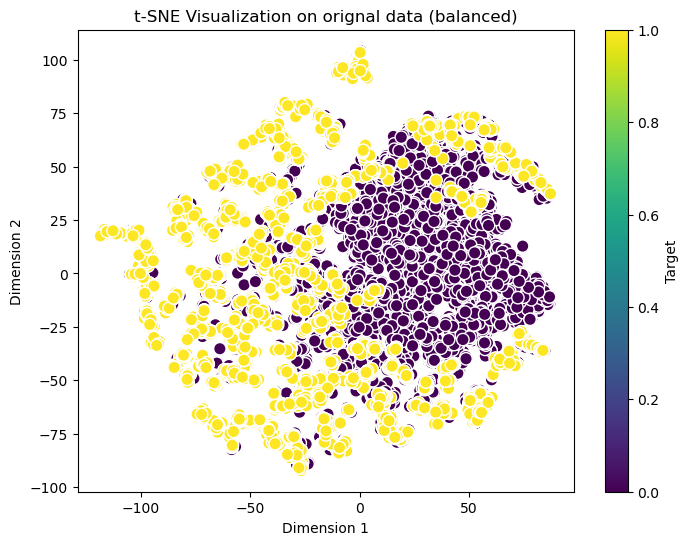

In [220]:
# ---------- Data manifold -------------
from sklearn.manifold import TSNE

X, y = X_res, y_res

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization on orignal data (balanced)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

> We arrive tha the balanced manifold which seems better that the original balanced dataset manifold. In fact keeping those selected features help (as much as it can) to separate the bankrupcies companies to non-bankrupcies. But the problem is still challenging as we don't have complete separation between classes

## 3- Feature selection

In [272]:
from sklearn.feature_selection import SelectKBest, chi2

In [273]:
df_features = df[selected_features]

# Perform chi-square feature selection to select the tops among selected features
k = int(np.round(len(df_features.columns)/1.5))
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(df_features, df_target)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

selected_features_=[]
for index in selected_feature_indices:
    selected_features_.append(df_features.columns[index])


selected_features_df = df_features[selected_features_]

In [274]:
print(" --- Selected features (feature with the most predictive power): --\n")
for i,val in enumerate(selected_features_):
    print(i+1,"- ",val)

 --- Selected features (feature with the most predictive power): --

1 -   CFO to Assets
2 -   Cash/Total Assets
3 -   Debt ratio %
4 -   Liability-Assets Flag
5 -   Per Share Net profit before tax (Yuan ¥)
6 -   Tax rate (A)
7 -   Total expense/Assets


In [275]:
print("features data shape : ",selected_features_df.shape)
print("Tagets data shape : ",df_target.shape)

features data shape :  (6819, 7)
Tagets data shape :  (6819,)


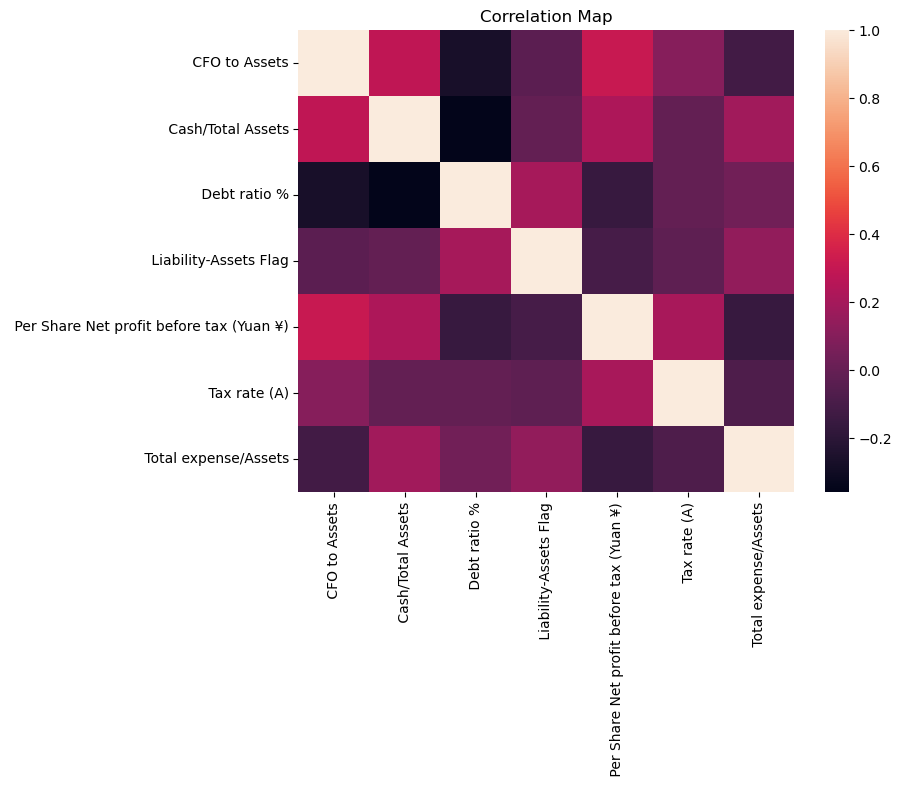

In [276]:
correlation = selected_features_df.corr()
# Plot the correlation map (heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation)
plt.title('Correlation Map')
plt.show()

In [277]:
X, y = selected_features_df.values, df_target.values

# Lets oversample our dataset using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

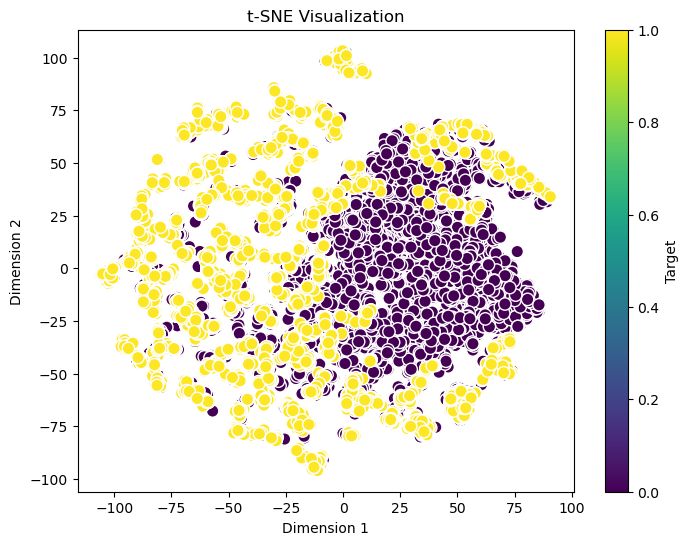

In [278]:
# -------- Data manifold after selecting 30% best features

X, y = X_res, y_res

# Create a t-SNE instance with the desired number of components
tsne = TSNE(n_components=2, random_state=42)

# Perform t-SNE dimensionality reduction
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Target'] = y

# Plot the t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], c=tsne_df['Target'], cmap='viridis', edgecolors='w', s=80)
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Target')
plt.show()

> Keeping 30% (bests) features doesn't change the manifold <br>
we still have the same informations in lower dimmension

## 4- Scaling and splitting

In [296]:
from sklearn.preprocessing import StandardScaler

In [297]:
# Create a StandardScaler instance
scaler = StandardScaler()
# Fit and transform the data using the StandardScaler
X_scaled = scaler.fit_transform(X_res)

In [298]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [299]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.3, random_state=42)

In [301]:
X_train.shape

(9238, 7)

## 5- Modelling

### 5.1- Logistic regressions Cross validation

In [304]:
# ----- Logistic regression -----
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
#classifier.fit(X_train_lda, y_train)


param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1],
}

# Create a GridSearchCV instance with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform grid search with cross-validation on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
LR_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Best Cross-validation Score: 0.8721599551864847


/Users/kiliemah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kiliemah/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kiliemah/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kiliemah/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 

In [306]:
# Make predictions on the test set
y_pred_train_LR = LR_model.predict(X_train)
y_pred_test_LR = LR_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_train = accuracy_score(y_train, y_pred_train_LR)
accuracy_test = accuracy_score(y_test, y_pred_test_LR)
print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.8726997185537996
Accuracy on test set: 0.865909090909091


### 5.2- SVM Cross validation

In [307]:
# ----- SVM -------
from sklearn.svm import SVC

classifier = SVC(kernel='rbf', probability=True,random_state=42)

param_grid = {
    'C': [0.1, 1, 1.5, 2 ],
    'kernel': ['rbf'],
    'gamma': [0.01, 0.1, 0.5, 1, 1.5]
}

# Create a GridSearchCV instance with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform grid search with cross-validation on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
SVM_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 2, 'gamma': 1.5, 'kernel': 'rbf'}
Best Cross-validation Score: 0.936025718551436


In [308]:
# Make predictions on the test set
y_pred_train_SVM = SVM_model.predict(X_train)
y_pred_test_SVM = SVM_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_train = accuracy_score(y_train, y_pred_train_SVM)
accuracy_test = accuracy_score(y_test, y_pred_test_SVM)
print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.9522623944576748
Accuracy on test set: 0.9396464646464646


### 5.3- KNN Cross validation

In [309]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 8, 10, 12 ],
    'weights': ['uniform'],
    'p': [1,2]
    
}

# Create a GridSearchCV instance with 5-fold cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Perform grid search with cross-validation on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)
KNN_model = grid_search.best_estimator_

Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
Best Cross-validation Score: 0.9364579158434058


In [310]:
# Make predictions on the test set
y_pred_train_KNN = KNN_model.predict(X_train)
y_pred_test_KNN = KNN_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_train = accuracy_score(y_train, y_pred_train_KNN)
accuracy_test = accuracy_score(y_test, y_pred_test_KNN)
print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.9656852132496211
Accuracy on test set: 0.9421717171717172


### 5.4- Random forest 

In [313]:
RF_model = RandomForestClassifier(random_state=42)

RF_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_train_RF = RF_model.predict(X_train)
y_pred_test_RF = RF_model.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy_train = accuracy_score(y_train, y_pred_train_RF)
accuracy_test = accuracy_score(y_test, y_pred_test_RF)
print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 1.0
Accuracy on test set: 0.9563131313131313


> **Models accuracies on test set** <br>
-- Logistic regressions : 0.865 <br>
-- SVM : 0.939 <br>
-- KNN : 0.94 <br>
-- Random forest : 0.95 <br>

## 6- Performance evaluation

In [316]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, roc_auc_score

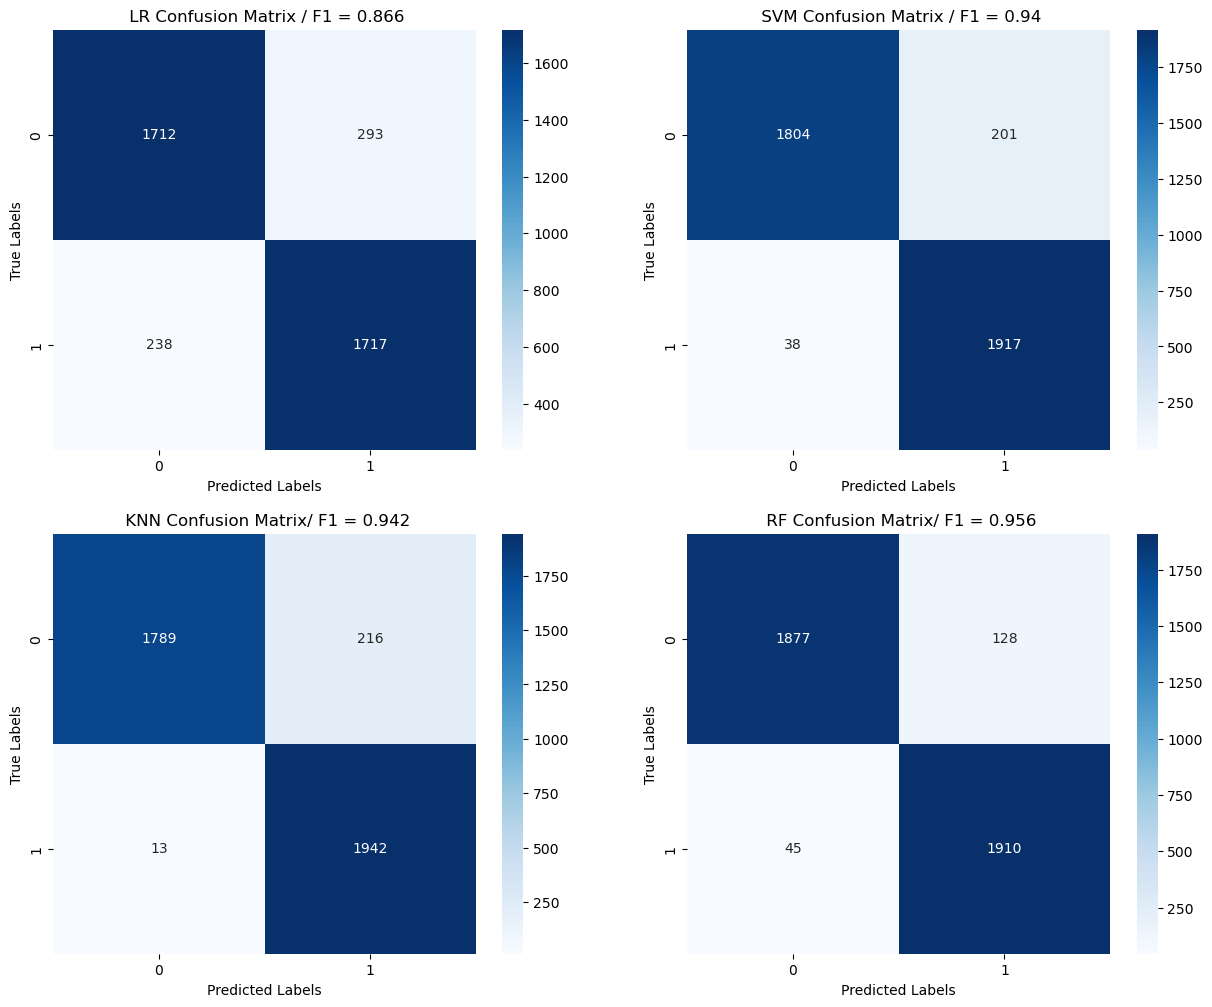

In [324]:
# Compute the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_test_LR)
cm_SVM = confusion_matrix(y_test, y_pred_test_SVM)
cm_KNN = confusion_matrix(y_test, y_pred_test_KNN)
cm_RF = confusion_matrix(y_test, y_pred_test_RF)

f1_LR = f1_score(y_test, y_pred_test_LR, average='weighted')
f1_SVM = f1_score(y_test, y_pred_test_SVM, average='weighted')
f1_KNN = f1_score(y_test, y_pred_test_KNN, average='weighted')
f1_RF = f1_score(y_test, y_pred_test_RF, average='weighted')

f1_LR = float(f"{f1_LR:.3f}")
f1_SVM = float(f"{f1_SVM:.3f}")
f1_KNN = float(f"{f1_KNN:.3f}")
f1_RF = float(f"{f1_RF:.3f}")


# Plot the confusion matrix using seaborn heatmap
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", ax=axes[0][0])
axes[0][0].set_xlabel('Predicted Labels')
axes[0][0].set_ylabel('True Labels')
axes[0][0].set_title(' LR Confusion Matrix '+'/ F1 = '+str(f1_LR))

sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", ax=axes[0][1])
axes[0][1].set_xlabel('Predicted Labels')
axes[0][1].set_ylabel('True Labels')
axes[0][1].set_title(' SVM Confusion Matrix '+'/ F1 = '+str(f1_SVM))

sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", ax=axes[1][0])
axes[1][0].set_xlabel('Predicted Labels')
axes[1][0].set_ylabel('True Labels')
axes[1][0].set_title(' KNN Confusion Matrix'+'/ F1 = '+str(f1_KNN))

sns.heatmap(cm_RF, annot=True, fmt="d", cmap="Blues", ax=axes[1][1])
axes[1][1].set_xlabel('Predicted Labels')
axes[1][1].set_ylabel('True Labels')
axes[1][1].set_title(' RF Confusion Matrix'+'/ F1 = '+str(f1_RF))

plt.show()


> LR seems less better than the 2 others

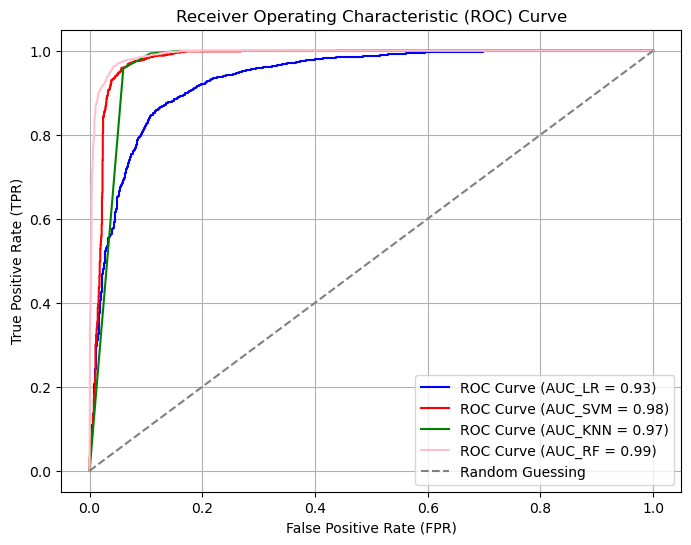

In [325]:
# Test stet Predictions probabilities 
y_prob_test_LR = LR_model.predict_proba(X_test)
y_prob_test_SVM = SVM_model.predict_proba(X_test)
y_prob_test_KNN = KNN_model.predict_proba(X_test)
y_prob_test_RF = RF_model.predict_proba(X_test)

# Computing ROC curves values for each model
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_prob_test_LR[:,1])
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, y_prob_test_SVM[:,1])
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_prob_test_KNN[:,1])
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_prob_test_RF[:,1])

# Computing AUC for each model
auc_LR = roc_auc_score(y_test, y_prob_test_LR[:,1])
auc_SVM = roc_auc_score(y_test, y_prob_test_SVM[:,1])
auc_KNN = roc_auc_score(y_test, y_prob_test_KNN[:,1])
auc_RF = roc_auc_score(y_test, y_prob_test_RF[:,1])

# Plot the ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_LR, tpr_LR, label='ROC Curve (AUC_LR = {:.2f})'.format(auc_LR), color='blue')
plt.plot(fpr_SVM, tpr_SVM, label='ROC Curve (AUC_SVM = {:.2f})'.format(auc_SVM), color='red')
plt.plot(fpr_KNN, tpr_KNN, label='ROC Curve (AUC_KNN = {:.2f})'.format(auc_KNN), color='green')
plt.plot(fpr_RF, tpr_RF, label='ROC Curve (AUC_RF = {:.2f})'.format(auc_RF), color='pink')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

> RF has better AUC than others. <br>
As RF has better F1 score and AUC than other, it look like the most suitable model. <br>